In [23]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from os import listdir
from os.path import isfile, join
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

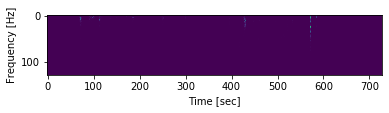

In [28]:
mypath = 'freesound-audio-tagging/audio_train/'
sound_files_training = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# sample spectogram
sample_rate, samples = wavfile.read(join(mypath, sound_files_training[200]))
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [32]:
spectrogram = np.array(spectrogram)
in_shape = spectrogram.shape

In [33]:
#CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(in_shape[0], in_shape[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))